# The JPEGinator

This notebook is meant to be used as a companion to the developerWorks recipe about creating an OpenWhisk Web Action.

First we load the necessary libraries


In [3]:
### THE JPEGINATOR
### Openwhisk bmp->jpeg conversion using OpenWhisk
### Author: Frederico Munoz <frederico.munoz@pt.ibm.com>
### Date: APR 2017
### License: Eclipse Public License v1.0

## Load the image-related libraries
library(jpeg)
library(pixmap)
library(grid)
library(base64enc)
library(httr)
library(jsonlite)


Attaching package: ‘grid’

The following object is masked from ‘package:SparkR’:

    explode



## Conversion process

To convert an image we need to have one; in the article I have provided a sample which I'm also using here

In [4]:
## Download, read and encode
image_file <- "lisboa_dl.png"
image_url <- "https://developer.ibm.com/recipes/wp-content/uploads/sites/41/2017/04/lisboa_arco.png"
jpeg_file <- "lisboa_arco.jpg"
download.file(image_url, image_file)
read_filename <- file(image_file, "rb")
b64 <- base64encode(read_filename)

## Getting the image

To use the Web Action we will use a POST request, using `httr`

In [5]:
## Set the REST endpoint - change for your own
url <- "https://openwhisk.ng.bluemix.net/api/v1/web/frederico.munoz%40pt.ibm.com_Default/default/jpeginator.json"

## The POST request itself, passing the image as a JSON argument
req <- POST(url, body = list(image = b64), encode = "json")

Let's inspect the result of our call:

In [6]:
## Parsing the request
j <- fromJSON(content(req, "text"))

## Let's see what we have here
str(j)

List of 3
 $ headers   :List of 1
  ..$ Content-Type: chr "image/jpeg"
 $ statusCode: int 200
 $ body      : chr "/9j/4AAQSkZJRgABAQIAdgB2AAD/2wBDAAMCAgICAgMCAgIDAwMDBAYEBAQEBAgGBgUGCQgKCgkICQkKDA8MCgsOCwkJDRENDg8QEBEQCgwSExIQEw8QEBD/2wBDAQM"| __truncated__


We can now write the resul to a file, using `base64decode`

In [7]:
## Write file (which is now a JPEG, courtesy of the JPEGINATOR!!!1!
## ... 
writeBin(base64decode(j$body), jpeg_file)

Did it work? Let's see

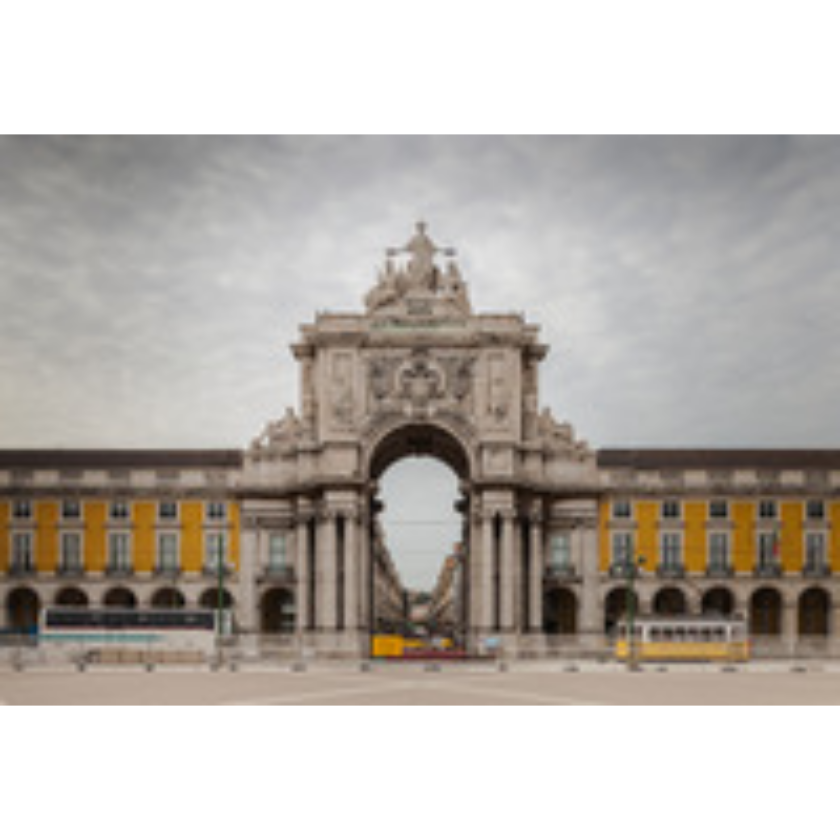

In [8]:
## Read the JPEG
jpeg <- readJPEG(jpeg_file)
## Display the JPEG
grid.raster(jpeg)

Pretty simple isn't it?

## Getting the image via HTTP

At the moment we are not making full use of Content extensions, even though our web action code is already prepared for it (it sets "image/jpeg" as the content type of the reply): since we are asking for JSON we get JSON, and the reason we are asking for JSON is because we have attached 

In [9]:
url <- "https://openwhisk.ng.bluemix.net/api/v1/web/frederico.munoz%40pt.ibm.com_Default/default/jpeginator.json"

With a slight change we can simplify out code: instead of receiving a JSON object and parsing it we can receive the image directly by simply appending `http`:

In [10]:
## New REST endpoint with an http extension
url <- "https://openwhisk.ng.bluemix.net/api/v1/web/frederico.munoz%40pt.ibm.com_Default/default/jpeginator.http"

Let's make the call to our action again:

In [11]:
## The POST request itself, passing the image as a JSON argument
req <- POST(url, body = list(image = b64), encode = "json")

We do not parse the reply in the same way now because we have a different structure altogether

In [15]:
req

Response [https://openwhisk.ng.bluemix.net/api/v1/web/frederico.munoz%40pt.ibm.com_Default/default/jpeginator.http]
  Date: 2017-04-21 15:29
  Status: 200
  Content-Type: image/jpeg
  Size: 11.9 kB
<BINARY BODY>
NULL

The JPEG image is already in the `content` in raw formatand we can use it directly

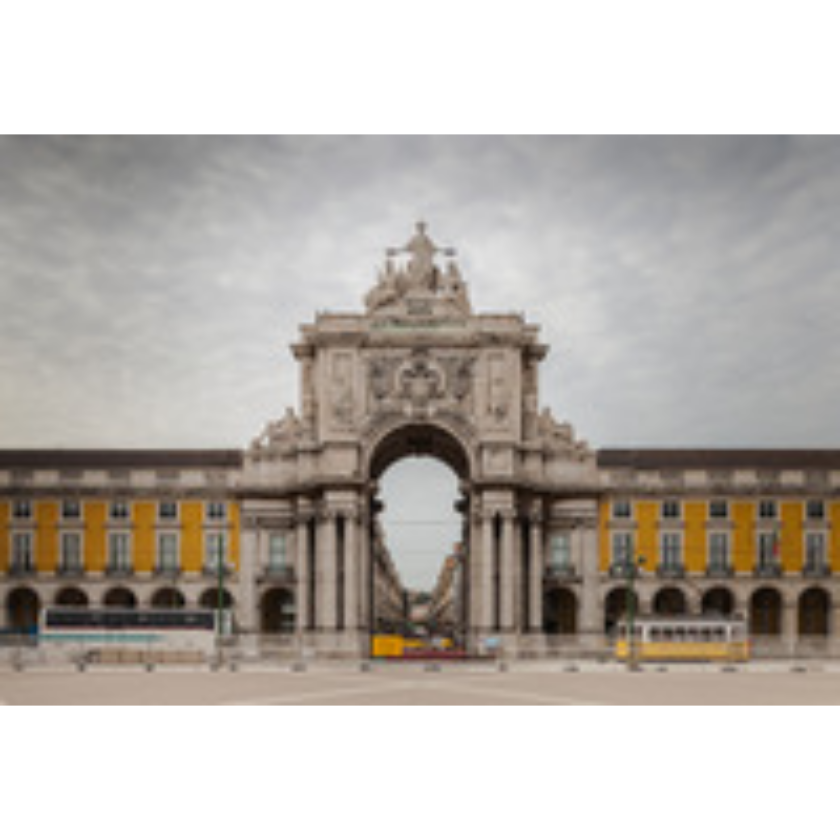

In [14]:
grid.raster(readJPEG(req$content))

And that's it, with Content Extensions we can simplify the use of OpenWhisk for different use-cases.